# Statistics about given data

In [ ]:
%pip install numpy

In [ ]:
%pip install matplotlib

In [ ]:
%pip install pandas

In [ ]:
%pip install scikit-learn

In [ ]:
%pip install keras

In [ ]:
%pip install tensorflow

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import pandas as pd

Data shape (977, 138)
X shape (977, 136)
y shape (977,)
There are 136 features
There are 7 uniques labels
Nombre d'instances de la classe anger : 149
Nombre d'instances de la classe disgust : 149
Nombre d'instances de la classe fear : 150
Nombre d'instances de la classe happy : 101
Nombre d'instances de la classe neutral : 130
Nombre d'instances de la classe sad : 149
Nombre d'instances de la classe surprise : 149


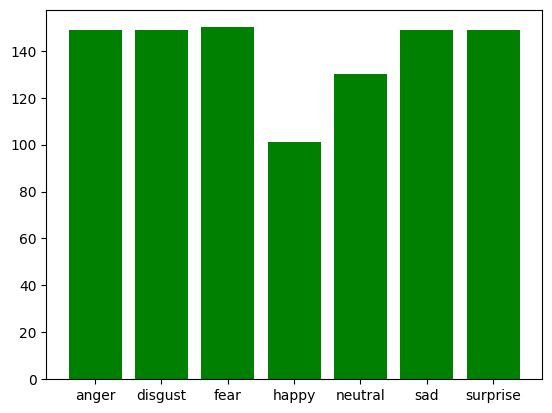

In [3]:
# Load CSV file
csv_path = "../project_data/training_set.csv"
data = pd.read_csv(csv_path).values

# Split data into features and labels
X = data[:, 2:]
y = data[:, 1]
image_names = data[:, 0]

# Inside X, there are landmarks coordinates, the first 67 columns are x coordinates, the last 67 columns are y coordinates
X_x = X[:, :68]
X_y = X[:, 68:]

# Print some stats
print("Data shape", data.shape)
print("X shape", X.shape)
print("y shape", y.shape)
print("There are {} features".format(X.shape[1]))
print("There are {} uniques labels".format(len(np.unique(y))))

# Plot histogram of labels
effectifs = {i:np.sum(y==i) for i in np.unique(y)}
for k,v in effectifs.items():
  print(f"Nombre d'instances de la classe {k} : {v}")

plt.bar(effectifs.keys(), effectifs.values(), color='g')
plt.show()

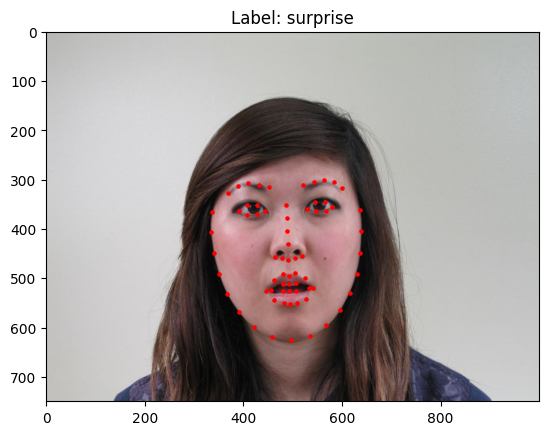

In [4]:
def plot_image(index):
    # Load image
    img = image.imread("../project_data/training_set/" + image_names[index])
    # Plot image
    plt.imshow(img)
    plt.title("Label: " + str(y[index]))
    # Draw landmarks
    for i in range(68):
        plt.scatter(X_x[index, i], X_y[index, i], c='r', s=5)

# Plot some images
plot_image(145)


3.5.0


c:\Users\basti\Documents\ESIEA\5A_Semestre_1\ML_Challenge\venvMLChallenge\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 128)            │        17,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,247 (102.53 KB)

 Trainable params: 26,247 (102.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1448 - loss: 138.6463 - val_accuracy: 0.1122 - val_loss: 45.6682
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1544 - loss: 38.3833 - val_accuracy: 0.2092 - val_loss: 34.7096
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1737 - loss: 30.1425 - val_accuracy: 0.1888 - val_loss: 39.7395
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1387 - loss: 33.4874 - val_accuracy: 0.1429 - val_loss: 14.6287
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1576 - loss: 15.8318 - val_accuracy: 0.1276 - val_loss: 18.2821
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1846 - loss: 20.0323 - val_accuracy: 0.1735 - val_loss: 35.4258
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1656 - loss: 29.0186 - val_accuracy: 0.1582 - val_loss: 26.4046
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2061 - loss: 18.5750 - val_acc

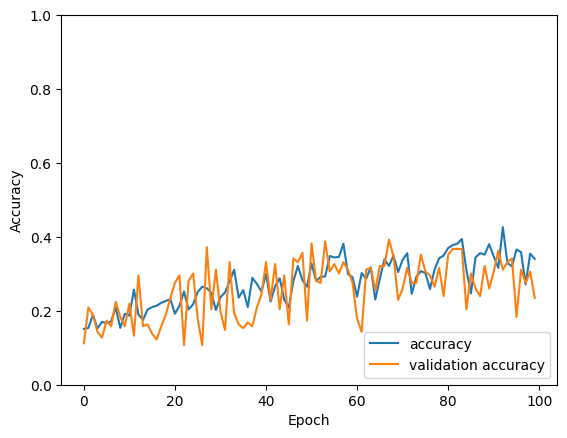

In [46]:
# Using sklearn to split data
from sklearn.model_selection import train_test_split
import keras
from keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print(keras.__version__)

emotion_to_number = {
    "neutral": 0,
    "happy": 1,
    "sad": 2,
    "anger": 3,
    "surprise": 4,
    "disgust": 5,
    "fear": 6
}

# Convert labels to numbers
y_int = np.array([emotion_to_number[label] for label in y])

# One-hot encode the labels
y_one_hot = utils.to_categorical(y_int, num_classes=7)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2)

# Make sure that the data is float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Create a simple model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


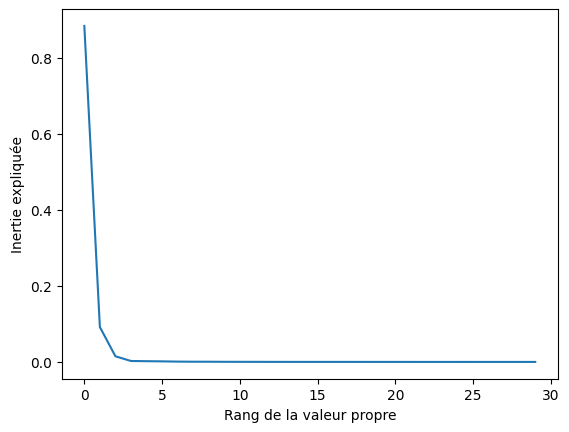

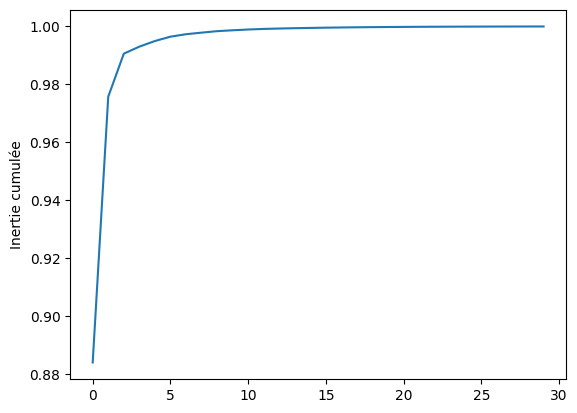

In [43]:
# Make a PCA on the data to reduce the number of features to 2
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit(X_train)

plt.plot([i for i in range(30)], pca.explained_variance_ratio_[:30])
plt.ylabel('Inertie expliquée')
plt.xlabel('Rang de la valeur propre')
plt.show()

plt.plot([i for i in range(30)], pca.explained_variance_ratio_.cumsum()[:30])
plt.ylabel('Inertie cumulée')
plt.xlabel('')
plt.show()

emotion_to_color = {
    "neutral": "r",
    "happy": "g",
    "sad": "b",
    "anger": "y",
    "surprise": "c",
    "disgust": "m",
    "fear": "k"
}

y_color = [emotion_to_color[i] for i in y]

## I'll try to use GridSearch

In [ ]:
%pip install xgboost

Fitting 7 folds for each of 1 candidates, totalling 7 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=  17.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=  13.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=  10.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=  13.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=  12.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=  14.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=  14.0s
Best param

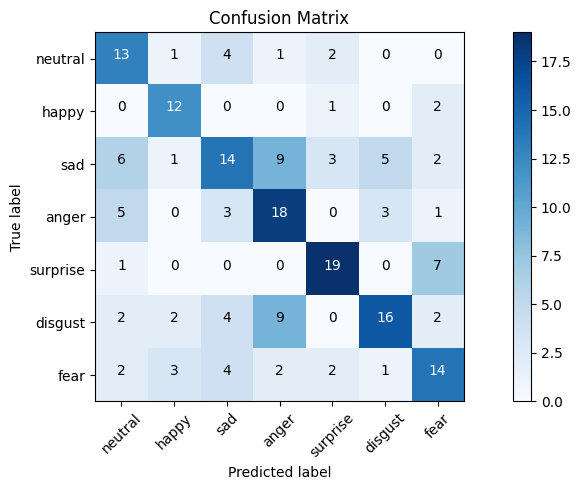

Classification Accuracy: 54.08%

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.62      0.52        21
           1       0.63      0.80      0.71        15
           2       0.48      0.35      0.41        40
           3       0.46      0.60      0.52        30
           4       0.70      0.70      0.70        27
           5       0.64      0.46      0.53        35
           6       0.50      0.50      0.50        28

    accuracy                           0.54       196
   macro avg       0.55      0.58      0.56       196
weighted avg       0.55      0.54      0.54       196



In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import itertools

# Load CSV file
csv_path = "../project_data/training_set.csv"
data = pd.read_csv(csv_path).values

# Split data into features and labels
X = data[:, 2:]
y = data[:, 1]
image_names = data[:, 0]

emotion_to_number = {
    "neutral": 0,
    "happy": 1,
    "sad": 2,
    "anger": 3,
    "surprise": 4,
    "disgust": 5,
    "fear": 6
}

# Convert labels to numbers
y_int = np.array([emotion_to_number[label] for label in y])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.2)

def tune_hyperparameters(X_train, y_train):
    param_grid = {
        'learning_rate': [0.1],
        'n_estimators': [200],
        'max_depth': [3],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'tree_method': ['hist'],
    }
    xgb = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', n_jobs=1, num_class=7)
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=7, n_jobs=1, verbose=2, scoring='accuracy', error_score='raise')
    grid_search.fit(X_train, y_train)
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    return grid_search.best_estimator_

def evaluate_model(model, x_test, y_test):
    y_predict = model.predict(x_test)
    accuracy = accuracy_score(y_predict, y_test)
    report = classification_report(y_test, y_predict)
    matrix = confusion_matrix(y_test, y_predict)
    return accuracy, report, matrix

def plot_confusion_matrix(matrix, labels, title='Confusion Matrix'):
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], 'd'), horizontalalignment="center", color="white" if matrix[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def plot_metrics(matrix, labels, accuracy, report):
    plt.figure(figsize=(10,5))
    plot_confusion_matrix(matrix, labels)
    plt.show()
    print(f"Classification Accuracy: {accuracy*100:.2f}%")
    print("\nClassification Report:\n", report)

best_model = tune_hyperparameters(X_train, y_train)
accuracy, report, matrix = evaluate_model(best_model, X_test, y_test)
plot_metrics(matrix, list(emotion_to_number.keys()), accuracy, report)

Fitting 7 folds for each of 40 candidates, totalling 280 fits
Best parameters found:  {'C': 100, 'gamma': 5e-06, 'kernel': 'linear'}
Best cross-validation score: 0.74


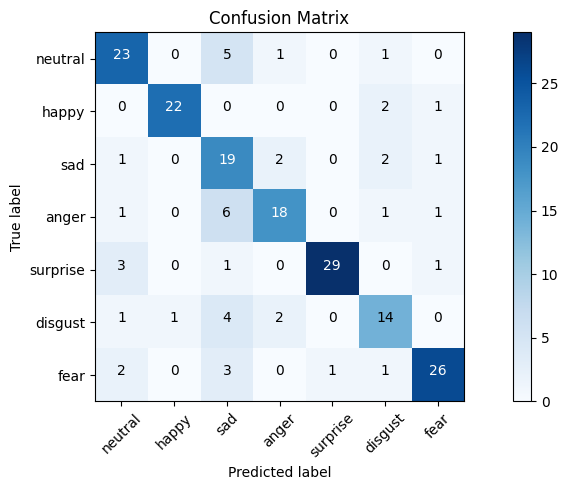

Classification Accuracy: 77.04%

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.96      0.88      0.92        25
           2       0.50      0.76      0.60        25
           3       0.78      0.67      0.72        27
           4       0.97      0.85      0.91        34
           5       0.67      0.64      0.65        22
           6       0.87      0.79      0.83        33

    accuracy                           0.77       196
   macro avg       0.78      0.76      0.77       196
weighted avg       0.80      0.77      0.78       196



In [44]:
from sklearn.svm import SVC
import pickle

# Load CSV file
csv_path = "../project_data/training_set.csv"
data = pd.read_csv(csv_path).values

# Split data into features and labels
X = data[:, 2:]
y = data[:, 1]
image_names = data[:, 0]

# Normalize data
X = X.astype('float32')
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

emotion_to_number = {
    "neutral": 0,
    "happy": 1,
    "sad": 2,
    "anger": 3,
    "surprise": 4,
    "disgust": 5,
    "fear": 6
}

# Convert labels to numbers
y_int = np.array([emotion_to_number[label] for label in y])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.2)

def save_model(model, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump({'model': model}, f)

def tune_hyperparameters_svm(X_train, y_train):
    param_grid = {
        'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
        'gamma': [0.000005, 0.001, 0.01, 0.1],  # Kernel coefficient for ‘rbf’
        'kernel': ['linear', 'rbf'],  # Use radial basis function kernel
    }
    svm = SVC(decision_function_shape='ovo')  # ovo: one-vs-one classification for multi-class
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=7, n_jobs=-1, verbose=2, scoring='accuracy', error_score='raise')
    grid_search.fit(X_train, y_train)
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    return grid_search.best_estimator_

best_model = tune_hyperparameters_svm(X_train, y_train)
accuracy, report, matrix = evaluate_model(best_model, X_test, y_test)
plot_metrics(matrix, list(emotion_to_number.keys()), accuracy, report)
# save_model(best_model, 'svm_model.p')

Predicted: sad, Actual: neutral for index 2
Predicted: sad, Actual: neutral for index 37
Predicted: surprise, Actual: fear for index 42
Predicted: fear, Actual: anger for index 46
Predicted: sad, Actual: neutral for index 48
Predicted: sad, Actual: anger for index 63
Predicted: neutral, Actual: fear for index 66
Predicted: sad, Actual: anger for index 90
Predicted: surprise, Actual: sad for index 101
Predicted: disgust, Actual: anger for index 106
Predicted: anger, Actual: disgust for index 113
Predicted: sad, Actual: anger for index 128
Predicted: neutral, Actual: anger for index 137
Predicted: neutral, Actual: sad for index 138
Predicted: sad, Actual: anger for index 140
Predicted: happy, Actual: surprise for index 151
Predicted: surprise, Actual: fear for index 154
Predicted: neutral, Actual: surprise for index 162
Predicted: anger, Actual: neutral for index 167
Predicted: neutral, Actual: fear for index 175
Predicted: sad, Actual: fear for index 200
Predicted: neutral, Actual: sad 

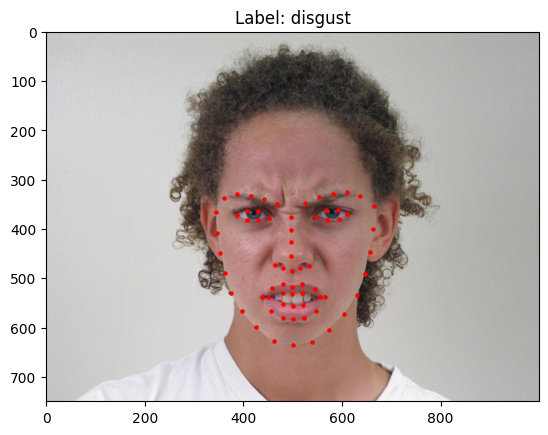

In [27]:
import pickle
from sklearn.metrics import accuracy_score

# Load CSV file
csv_path = "../project_data/training_set.csv"
data = pd.read_csv(csv_path).values

# Split data into features and labels
X = data[:, 2:]
y = data[:, 1]
image_names = data[:, 0]

# Normalize data
X = X.astype('float32')
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

emotion_to_number = {
    "neutral": 0,
    "happy": 1,
    "sad": 2,
    "anger": 3,
    "surprise": 4,
    "disgust": 5,
    "fear": 6
}

# Convert labels to numbers
y_int = np.array([emotion_to_number[label] for label in y])

def get_model():
    with open('svm_model.p', 'rb') as f:
        model_data = pickle.load(f)
    return model_data['model']

model = get_model()

number_to_emotion = {
    0 : "neutral",
    1 : "happy",
    2 : "sad",
    3 : "anger",
    4 : "surprise",
    5 : "disgust",
    6 : "fear"
}

# Test model on all data
y_predict = model.predict(X)
# accuracy = accuracy_score(y_predict, y_int)

number_of_wrong_guess = 0

# print differences between predicted and actual labels
for i in range(len(y)):
    if y_int[i] != y_predict[i]:
        print(f"Predicted: {number_to_emotion[y_predict[i]]}, Actual: {y[i]} for index {i}")
        number_of_wrong_guess += 1

print(f"Number of wrong guesses: {number_of_wrong_guess}")

index = 300

print(f"Predicted: {number_to_emotion[y_predict[index]]}, Actual: {y[index]}")
plot_image(index)

print(accuracy)
